# 1. Figure 1b M-T distribution of catalogs

/var/folders/y4/__h0s0zj0qb4gjkjzynnyrcr0000gn/T/ipykernel_63778/2858156455.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/Users/chouyuhin/_Harvard/b-value/catalogs/CENCcat-format.txt',  names=column_names, delim_whitespace=True)
/var/folders/y4/__h0s0zj0qb4gjkjzynnyrcr0000gn/T/ipykernel_63778/2858156455.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


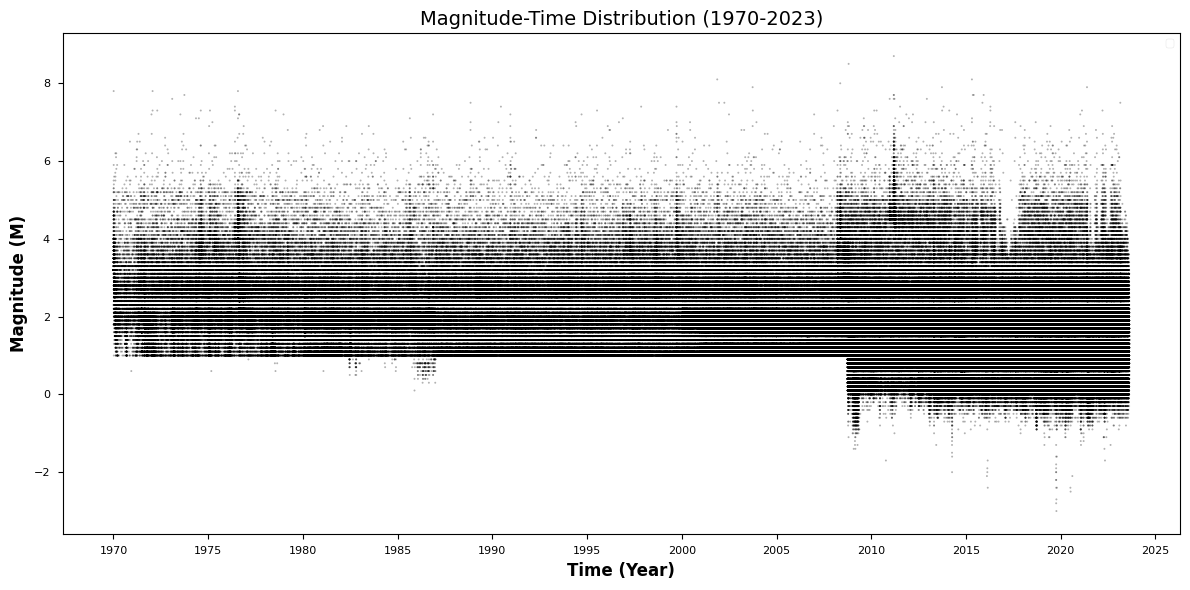

In [18]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

# 读取地震目录数据
# data = 'G:/BHT/alltime_30_23weidu_catalog.txt'

# 将数据转换为DataFrame
column_names = ['year', 'month', 'day', 'hour', 'minute', 'second', 'latitude', 'longitude', 'depth', 'mag_type', 'magnitude']
df = pd.read_csv('/Users/chouyuhin/_Harvard/b-value/catalogs/CENCcat-format.txt',  names=column_names, delim_whitespace=True)
df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])




# 输出筛选后的地震点
#print("筛选后的地震点：")
#print(filtered_df)

# 让 depth 增加随机扰动，防止数据点重合
df['depth_jitter'] = df['depth'] + np.random.uniform(-0.5, 0.5, size=len(df))

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 设置风格
plt.style.use('seaborn-v0_8-paper') # 或者 'ggplot'
fig, ax = plt.subplots(figsize=(12, 6))

# 1. 绘制散点图
# alpha=0.3: 设置透明度，看清密度
# s=2: 设置点的大小，微小点
# c='k': 黑色点，或者你可以用 c=df['depth'] cmap='viridis' 来按深度着色
sc = ax.scatter(df['time'], df['magnitude'], s=2, c='black', alpha=0.3, edgecolors='none')

# 2. 修正坐标轴
ax.set_xlabel('Time (Year)', fontsize=12, fontweight='bold')
ax.set_ylabel('Magnitude (M)', fontsize=12, fontweight='bold')
ax.set_title('Magnitude-Time Distribution (1970-2023)', fontsize=14)

# 3. 标记关键事件 (比如汶川地震)
# 假设 wenchuan_time 是 datetime 对象
# ax.axvline(x=wenchuan_time, color='red', linestyle='--', linewidth=1, label='Wenchuan Eq.')

# 4. 处理时间轴格式 (如果 x轴是 datetime 对象)
ax.xaxis.set_major_locator(mdates.YearLocator(5)) # 每5年一个刻度
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 5. 添加完备性震级辅助线 (假设 Mc=1.5)
# ax.axhline(y=1.5, color='gray', linestyle=':', label='Mc (approx)')

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()